# Draft code for homework 2
...because it's easier to mess around in a Jupyter notebook than in a python script!

Note: all images in this script are assumed to be in grayscale; this is true for the Yale images used in this assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os

# from scipy import linalg


In [2]:
main_dir = '/Users/jmnugent/Documents/__Year_3_2020-2021/AMATH_584-Numerical_Linear_Algebra/Homework/'

crop_dir = main_dir + 'python/CroppedYale/'
uncrop_dir = main_dir + 'python/yalefaces_uncropped/yalefaces/'
save_dir = main_dir + 'hw2/'


## Read in the data:
##### Get the data matrices for all images within each subject's subfolder and average them

### Cropped:

In [3]:
# get a list of paths to each subfolder in CroppedYale
paths = [crop_dir + dirname for dirname in os.listdir(crop_dir)
         if os.path.isdir(os.path.join(crop_dir, dirname))]

# initialize list to hold the averaged data matrices for each image
n_img = len(paths)
cropped_pics = [[]]*n_img

for i in range(n_img):
    # get the list of file names within the subfolder for that image
    subfolder = paths[i] + '/'
    imagenames = [subfolder + f for f in os.listdir(subfolder)
                  if os.path.isfile(os.path.join(subfolder, f))]
    
    # make one list containing the data matrices for each (grayscale) image 
    images = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2GRAY) for x in imagenames]

    # averaged the data matrix for this image and add to the list
    cropped_pics[i] = np.mean(images, axis=0)
    

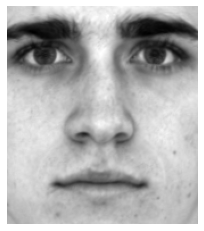

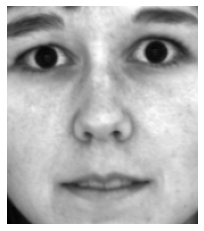

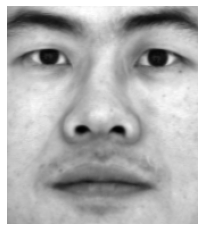

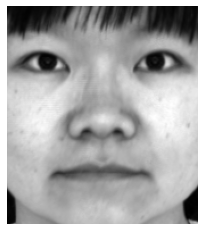

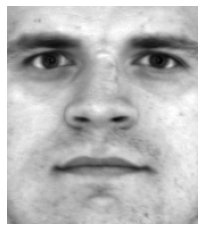

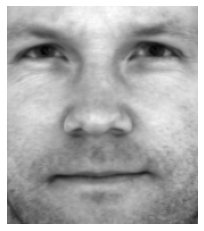

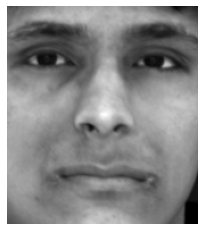

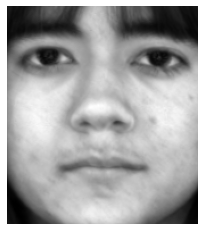

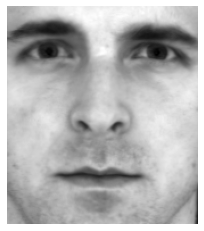

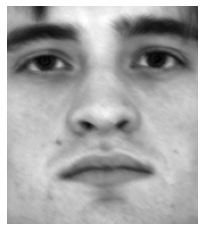

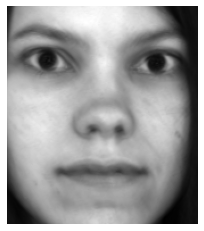

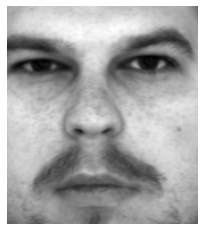

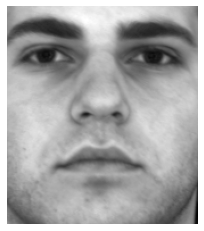

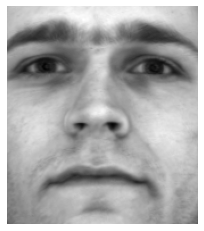

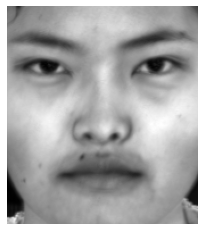

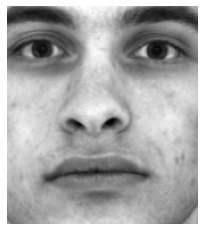

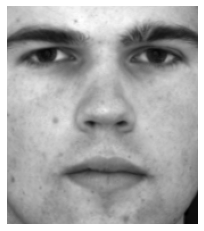

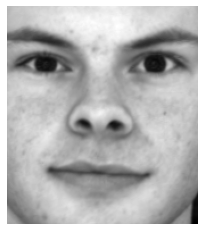

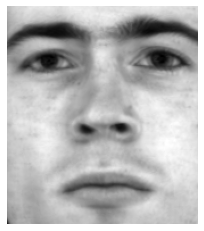

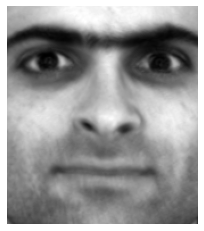

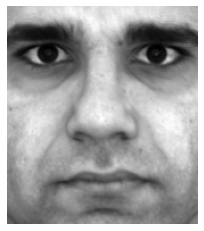

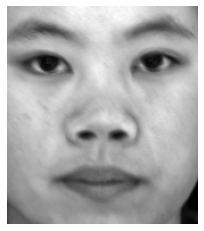

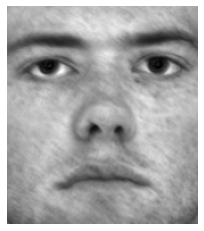

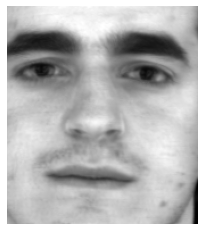

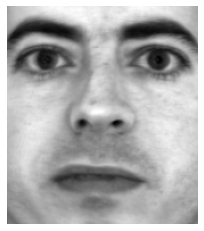

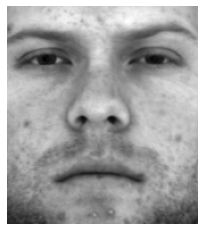

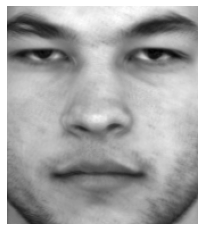

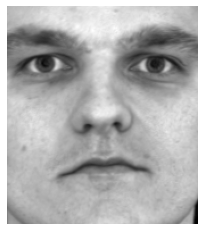

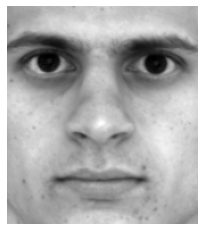

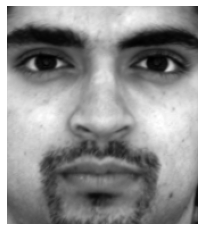

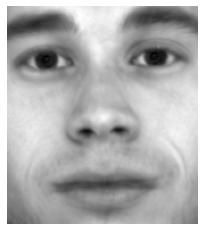

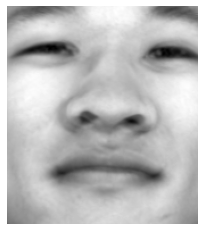

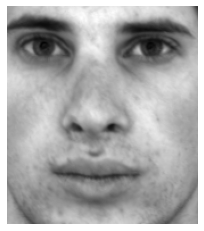

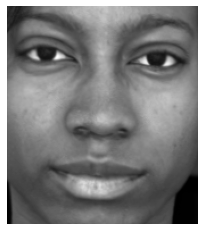

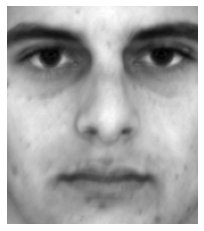

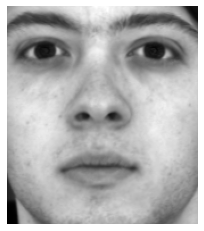

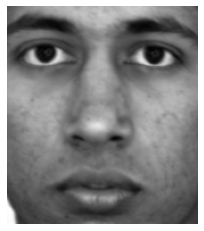

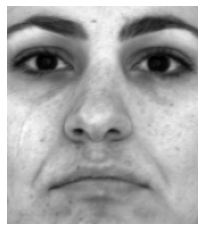

In [4]:
# test it!

for i in range(len(cropped_pics)):
    plt.imshow(cropped_pics[i], cmap='gray')
    plt.axis('off')
    plt.show()


### Uncropped:

# TODO: 
Will need to split the file paths to sort by subject since the uncropped images are NOT in subdirectories!

In [22]:
# # # get a list of paths to each subfolder in yalefaces_uncropped
# # unpaths = [uncrop_dir + dirname for dirname in os.listdir(uncrop_dir)
# #            if os.path.isdir(os.path.join(uncrop_dir, dirname))]
# # nuc_img = len(unpaths)

# # # initialize list to hold the averaged data matrices for each image
# # uncropped_pics = [[]]*nuc_img

# # for i in range(n_img):
# # get the list of file names within the subfolder for that image
# # unsubfolder = unpaths[i] + '/'
# imagenames_uc = [uncrop_dir + f for f in os.listdir(uncrop_dir)
#                  if os.path.isfile(os.path.join(uncrop_dir, f))]

# # make one list containing the data matrices for each image
# images_uc = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2GRAY) for x in imagenames_uc]

# # averaged the data matrix for this image and add to the list
# uncropped_pics[i] = np.mean(images_uc, axis=0)


In [23]:
# # test it!

# for i in range(len(uncropped_pics)):
#     plt.imshow(cropped_pics[i], cmap='gray')
#     plt.axis('off')
#     plt.show()


## 1. Do an SVD analysis of the images
(where each image is reshaped into a column vector and each column is a new image).

### Cropped

In [9]:
%%time
# SVD analysis on the averaged matrices

A = np.asarray([x.flatten() for x in cropped_pics])
C = np.matmul(A, np.transpose(A))

# economy SVD; following notation in Brunton & Kutz, s. 1.1
[Uhat, Shat, VThat] = np.linalg.svd(A, full_matrices=False)


CPU times: user 257 ms, sys: 27.3 ms, total: 284 ms
Wall time: 152 ms


In [10]:
print(A.shape, Uhat.shape, Shat.shape, VThat.shape)

(38, 32256) (38, 38) (38,) (38, 32256)


In [16]:
Uhat[:, :r].shape

(38, 10)

In [20]:
np.diag(Shat[:r]).shape

(10, 10)

In [18]:
np.transpose(VThat[:, :r]).shape

(10, 38)

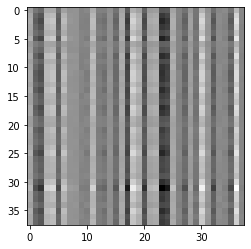

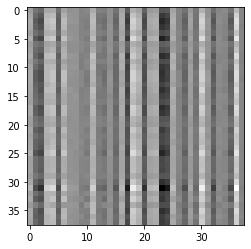

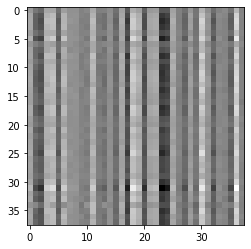

In [22]:
# approximated image for various ranks r

for r in [10, 20, 38]:
    xapprox = np.matmul(np.matmul(Uhat[:, :r], np.diag(Shat[:r])), np.transpose(VThat[:, :r]))
    plt.imshow(xapprox, cmap='gray')
    plt.show()


In [34]:
np.transpose(A[1, :]).shape

(32256,)

In [35]:
# proj = np.matmul(A[:, 4000], VT)
proj = np.matmul(np.transpose(A[:, 4000]), VT)


In [36]:
test.shape

(192, 168)

In [37]:
test = np.reshape(proj, cropped_pics[0].shape)

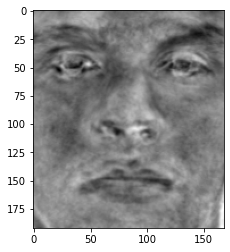

In [38]:
plt.imshow(test, cmap='gray')

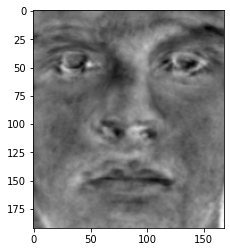

In [28]:
plt.imshow(test, cmap='gray')

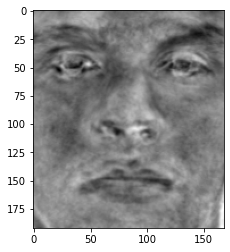

In [31]:
plt.imshow(test, cmap='gray')

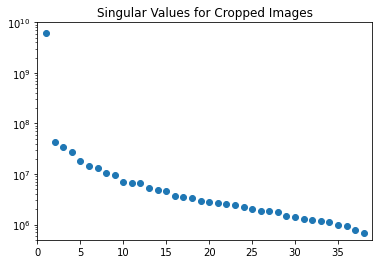

In [5]:
# test plot of singular values

plt.scatter(np.arange(1, len(S)+1), S)

plt.yscale('log')
plt.xlim([0, len(S)+1])
plt.ylim(5e5, 1e10)

plt.xticks(np.arange(0, len(S))[::5])

plt.title('Singular Values for Cropped Images')

plt.show()


### Uncropped

## 2. What is the interpretation of the U, Σ and V matrices?
(Plot the first few reshaped columns of U)

# COME BACK HERE!
I need to review what these mean/which plots will be meaningful...

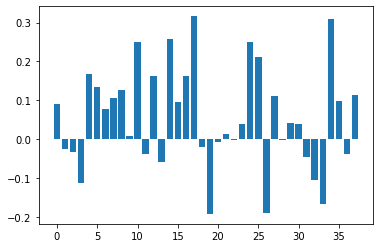

In [97]:
proj = [np.matmul(U[i, :], VT[i, :]) for i in range(len(S))]
plt.bar(np.arange(0, len(S)), proj)
plt.show()

# each of these bars indicates ...?

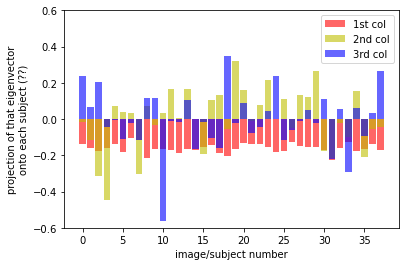

In [73]:
plt.bar(np.arange(len(S)), U[:, 0], label='1st col', alpha=0.6, color='r')
plt.bar(np.arange(len(S)), U[:, 1], label='2nd col', alpha=0.6, color='y')
plt.bar(np.arange(len(S)), U[:, 2], label='3rd col', alpha=0.6, color='b')

plt.xlabel('image/subject number')
plt.ylim(-0.6, 0.6)
plt.ylabel('projection of that eigenvector\nonto each subject (??)')
plt.legend()

plt.show()


## 3. What does the singular value spectrum look like and how many modes are necessary for good image reconstructions using the PCA basis?
(i.e. what is the rank r of the face space?)

## 4. Compare the difference between the cropped (and aligned) versus uncropped images in terms of singular value decay and reconstruction capabilities.